# 図 8.2 の生成（アルゴリズム 8.3）

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gmean
from sklearn.metrics import pairwise_distances
import torchvision

In [2]:
dataset = torchvision.datasets.MNIST(root='/tmp/', download=True)

In [3]:
zeros = [x[0] for x in dataset if x[1] == 0]

In [4]:
n = 9

In [5]:
N = 56
M = 28
np.random.seed(0)
canvases = []
for i in range(n):
    canvas = np.zeros((N, N))
    bi, bj = np.random.randint(N - M, size=2) # 平行移動の量をサンプリング
    canvas[bi:bi+M, bj:bj+M] = zeros[i]
    canvas = canvas / canvas.sum() # 総和 1 になるように正規化
    canvases.append(canvas)
canvases = np.array(canvases)

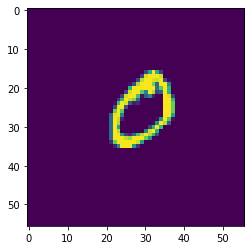

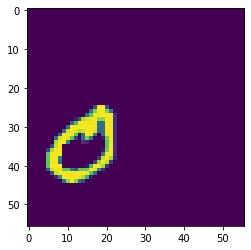

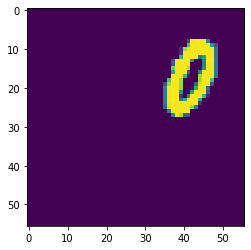

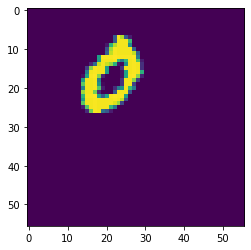

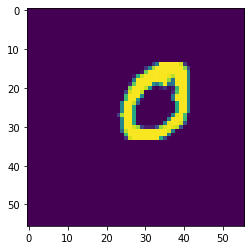

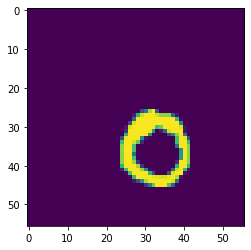

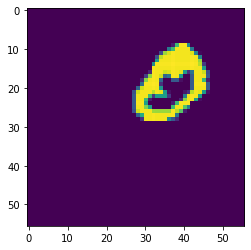

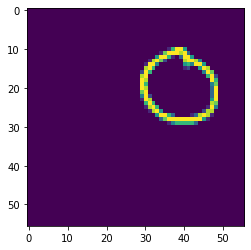

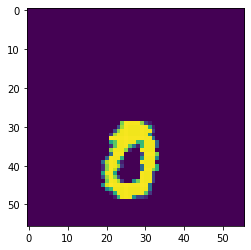

In [6]:
for i in range(9):
    plt.clf()
    plt.imshow(canvases[i])
    plt.show()

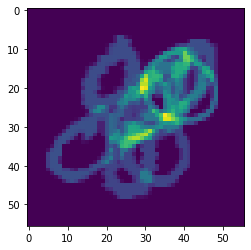

In [7]:
plt.imshow(canvases.mean(0))

In [8]:
x, y = np.meshgrid(np.arange(N), np.arange(N))
z = np.array([x.reshape(-1), y.reshape(-1)]).T
C = pairwise_distances(z)
K = np.exp(-C / 0.4)

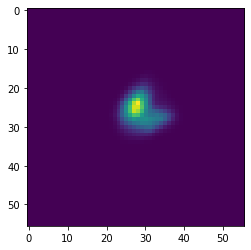

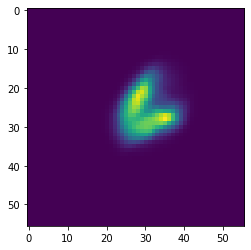

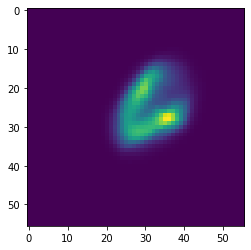

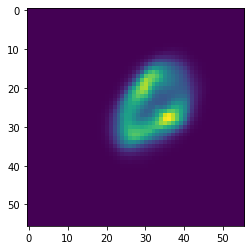

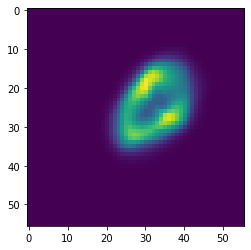

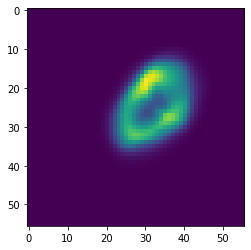

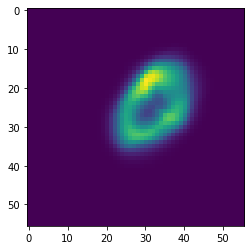

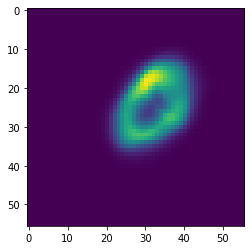

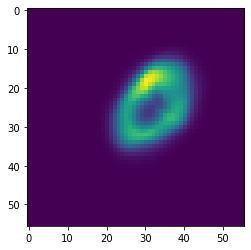

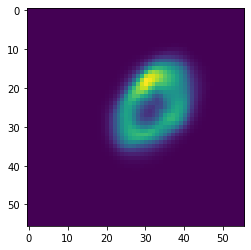

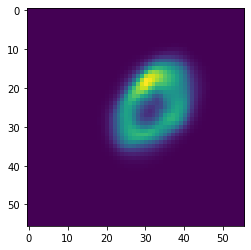

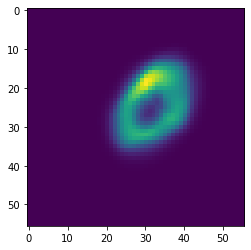

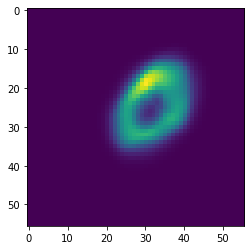

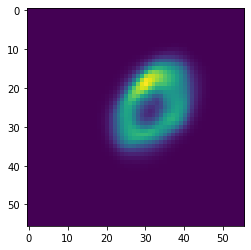

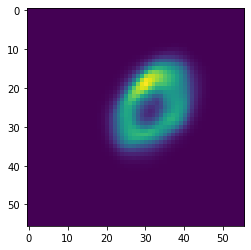

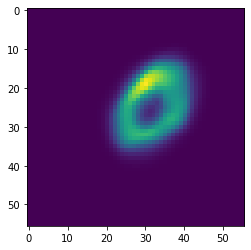

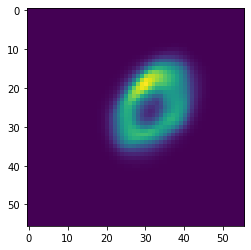

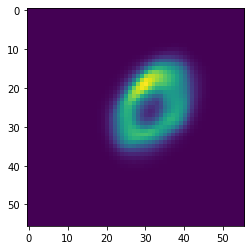

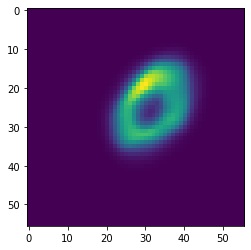

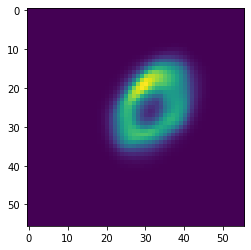

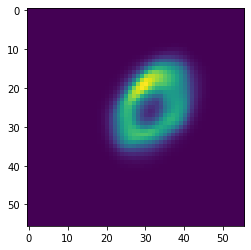

In [9]:
# アルゴリズム 8.3

meps = 1e-64
u = np.ones((n, N * N))

cc = canvases.reshape(n, -1)

for _ in range(20):
    v = cc / (np.matmul(K, u.reshape(n, -1).T).T + meps)
    vagg = gmean(np.matmul(K, v.reshape(n, -1).T).T)[None, ...]
    u = vagg / (np.matmul(K, v.reshape(n, -1).T).T + meps)
    plt.clf()
    plt.imshow(vagg[0].reshape(N, N))
    plt.show()
vagg /= vagg.max()
plt.imshow(vagg[0].reshape(N, N))